In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
melody_a = [58, 84, 48, 83, 73, 71, 108, 108, 98, 108, 73, 73, 84, 83, 118, 83, 108, 83, 63, 98]
melody_b = [23, 54, 43, 83, 73, 71, 108, 108, 98, 108, 73, 73, 84, 83, 118, 83, 108, 83, 63, 98]

In [94]:
def pitch_note_split(melody):
    melody = np.array(melody)
    durations = melody % 5

    melody = (melody - durations) / 5
    durations = 4 / 2 ** durations
    return melody, durations


melody_a, durations_a = pitch_note_split(melody_a)
melody_b, durations_b = pitch_note_split(melody_b)

In [95]:
def transform_relative_pitch(melody):
    # using the formula x = p - avg(p)

    average_pitch = np.average(melody)
    melody = melody - average_pitch
    return melody


relative_melody_a = transform_relative_pitch(melody_a)
relative_melody_b = transform_relative_pitch(melody_b)

In [96]:
def relationship_comparative_line(melody, durations):
    # using the formula tan (a) = (x_b - x_a) / length_x_a

    relationship = (melody[1:] - melody[:-1]) / durations[:-1]
    return relationship


inclination_melody_a = relationship_comparative_line(relative_melody_a, durations_a)
inclination_melody_b = relationship_comparative_line(relative_melody_b, durations_b)

In [97]:
def pitch_difference_limit(relative_melody_1, relative_melody_2):
    """
    LIMIT_x = Max_x - Min_x
    Limit_x : The limit value for the relative pitch difference value
    Max_x : The maximum relative pitch value
    Min_x : The minimum relative pitch value
    Max_x = MAX(Max_x1, Max_x2)
    Minx = MIN(Min_x1, Min_x2)
    Max_x1, Max_x2 : Maximum relative pitch values of melody 1 and melody 2, respectively
    Min_x1, Min_x2 : Minimum relative pitch values of melody 1 and melody 2, respectively
    :param relative_melody_1: main relatively pitched comparative unit (preset)
    :param relative_melody_2: secondary relatively pitched comparative unit (melody to be checked)
    :return: maximum limit of pitch difference
    """

    min_x = min(min(relative_melody_1), min(relative_melody_2))
    max_x = max(max(relative_melody_1), max(relative_melody_2))
    limit = max_x - min_x
    return limit


pitch_diff_limit = pitch_difference_limit(relative_melody_a, relative_melody_b)
pitch_diff_limit

19.0

In [98]:
def inclination_difference_limit(inclination_1, inclination_2):
    """
    Limit_tan(α) = Max_tan(α) – Min_tan(α)
    Limit_tan(α) : The limit value for the inclination
    difference value
    Max_tan(α) : The maximum inclination value
    Min_tan(α) : The minimum inclination value
    Max_tan(α) = MAX(Max_tan(α1), Max_tan(α2))
    Min_tan(α) = MIN(Min_tan(a1), Min_tan(a2))
    Max_tan(α1), Max_tan(α2) : Maximum inclination values of melody 1 and melody 2, respectively
    Min_tan(a1), Min_tan(a2): Minimum inclination values of melody 1 and melody 2, respectively

    :param inclination_1: inclination values of melody 1
    :param inclination_2: inclination values of melody 2
    :return: limit of inclination difference
    """

    min_x = min(min(inclination_1), min(inclination_2))
    max_x = max(max(inclination_1), max(inclination_2))
    limit = max_x - min_x
    return limit


inclination_diff_limit = inclination_difference_limit(inclination_melody_a, inclination_melody_b)

In [99]:
def pitch_similarity(x1, x2, pitch_diff_lim):
    """
    Formula: 1 -  | x1 = x2 | / Limit_x

    :param x1: relative pitch values of the preset
    :param x2: relative pitch values of the melody being compared
    :param pitch_diff_lim: maximum limit of pitch difference
    :return: pitch similarity score
    """
    return 1 - abs(x1 - x2) ** 0.5 / pitch_diff_lim ** 0.5


pitch_similarity_result = pitch_similarity(relative_melody_a, relative_melody_b, pitch_diff_limit)
pitch_similarity_result

array([0.42417108, 0.47184532, 0.87434383, 0.80805703, 0.80805703,
       0.80805703, 0.80805703, 0.80805703, 0.80805703, 0.80805703,
       0.80805703, 0.80805703, 0.80805703, 0.80805703, 0.80805703,
       0.80805703, 0.80805703, 0.80805703, 0.80805703, 0.80805703])

In [100]:
def inclination_similarity(inclination_1, inclination_2, inclination_diff_lim):
    """
    Formula: 1 - | tan(a1) - tan(a2) | / Limit_tan(a)
    :param inclination_1: inclination values of the preset
    :param inclination_2: inclination values of the melody to be compared
    :param inclination_diff_lim: maximum limit of inclination difference
    :return: inclination similarity score
    """
    return 1 - abs(inclination_1 - inclination_2) ** 0.5 / inclination_diff_lim ** 0.5


inclination_similarity_result = inclination_similarity(inclination_melody_a, inclination_melody_b,
                                                       inclination_diff_limit)
inclination_similarity_result

array([0.78679928, 0.32580014, 0.78679928, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [101]:

def weighted_pitch_similarity(pitch_sim_result, length):
    """
    Calculates the weighted average of pitch similarity scores having the note duration as weights
    """
    return np.sum(pitch_sim_result * length) / np.sum(length)


weighted_pitch_similarity_result = weighted_pitch_similarity(pitch_similarity_result, durations_a)

In [102]:
def weighted_inclination_similarity(inclination_sim_result, length):
    """
    Calculates the weighted average of pitch similarity scores having the note duration as weights
    """
    return np.sum(inclination_sim_result * length[:-1]) / np.sum(length[:-1])


weighted_inclination_similarity_result = weighted_inclination_similarity(inclination_similarity_result, durations_a)

In [103]:
def overall_similarity(weighted_pitch_sim_result, weighted_inclination_sim_result):
    return (weighted_pitch_sim_result + weighted_inclination_sim_result) / 2


similarity_percentage = overall_similarity(weighted_inclination_similarity_result,
                                           weighted_inclination_similarity_result)


In [104]:
% matplotlib inline
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


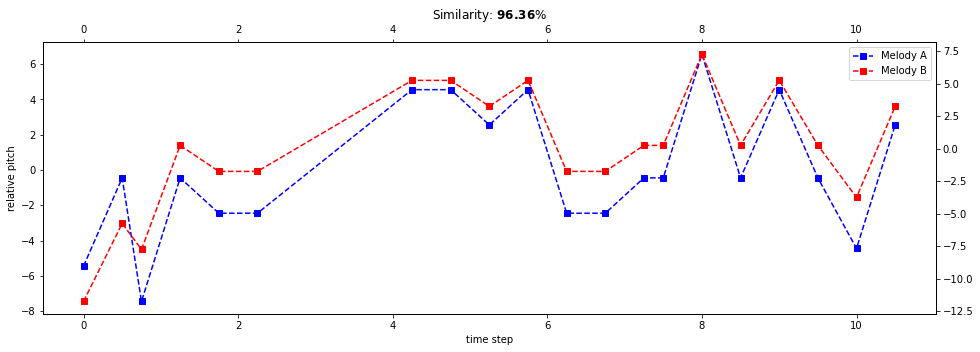

In [105]:
timestep_1 = [0]

for index, duration in enumerate(durations_a[:-1]):
    timestep_1.append(timestep_1[index] + duration)

timestep_2 = [0]

for index, duration in enumerate(durations_b[:-1]):
    timestep_2.append(timestep_2[index] + duration)

minimum_relative_pitch = min(min(relative_melody_a), min(relative_melody_b))
maximum_relative_pitch = max(max(relative_melody_a), max(relative_melody_b))

fig, ax1 = plt.subplots(figsize=(16, 5))
graph_1 = ax1.plot(timestep_1, relative_melody_a, marker='s', linestyle='--', color='b', label='Melody A')
ax1.set_xlabel('time step')
ax1.set_ylabel('relative pitch')

ax2 = ax1.twinx().twiny()
graph_2 = ax2.plot(timestep_2, relative_melody_b, marker='s', linestyle='--', color='r', label='Melody B')

graphs = graph_1 + graph_2
labels = [graph.get_label() for graph in graphs]
plt.legend(graphs, labels)
plt.title("Similarity: "+r"$\bf{" + str(round(similarity_percentage * 100, 2)) + "}$%")
plt.show()
fig.savefig("output2.png")


In [53]:
def get_music_similarity(m1, m2):
    m1, d1 = pitch_note_split(m1)
    m1, d2 = pitch_note_split(m2)

    rm1 = transform_relative_pitch(m1)
    rm2 = transform_relative_pitch(m2)
    im1 = relationship_comparative_line(rm1, d1)
    im2 = relationship_comparative_line(rm2, d2)

    pdl = pitch_difference_limit(rm1, rm2)
    idl = inclination_difference_limit(im1, im2)

    psr = pitch_similarity(rm1, rm2, pdl)
    isr = inclination_similarity(im1, im2, idl)
    wpsr = weighted_pitch_similarity(psr, d1)
    wisr = weighted_inclination_similarity(isr, d1)
    sp = overall_similarity(wpsr, wisr)
    print(sp * 100)

    t1 = [0]
    for k, d in enumerate(d1[:-1]):
        t1.append(t1[k] + d)

    t2 = [0]

    for j, d in enumerate(d2[:-1]):
        t2.append(t2[j] + d)

    fig, ax1 = plt.subplots(figsize=(32, 6))
    graph_1 = ax1.plot(t1, rm1, marker='s', linestyle='--', color='b', label='Preset')
    ax1.set_xlabel('time step')
    ax1.set_ylabel('relative pitch')

    ax2 = ax1.twinx().twiny()
    graph_2 = ax2.plot(t2, rm2, marker='s', linestyle='--', color='r', label='Melody')

    graphs = graph_1 + graph_2
    labels = [graph.get_label() for graph in graphs]
    plt.legend(graphs, labels)
    plt.show()


63.703400078857086


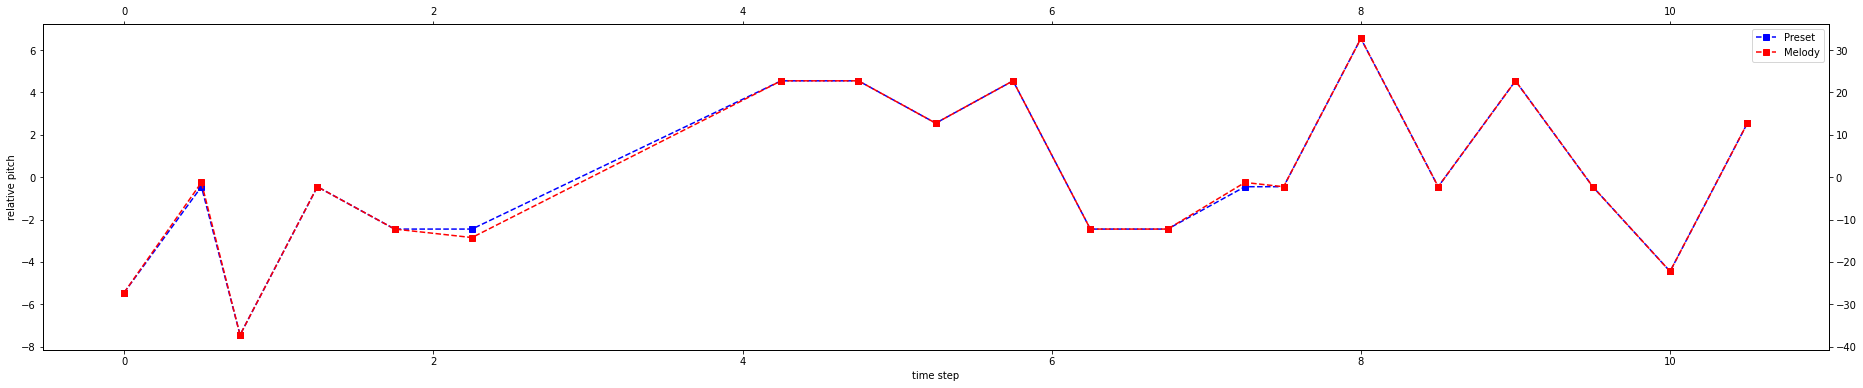

In [54]:
get_music_similarity(melody_a, melody_b)